# build the site docs

building documentation with `nbconvert` and dataframes. this approach treats document as data using the
`nbformat` at the primary interface for multimedia content.

the following is an example rendering https://tonyfast.github.io/tonyfast/draft/tonyfast/tonyfast/tonyfast/xxiii/2023-12-13-jupyter-community-call.html . something got wonky with the paths.

In [1]:
    import tonyfast.utils, pandas, json, nbconvert, nbformat, operator, bs4, anyio, pathlib, re, os
    __import__("nest_asyncio").apply()

In [2]:
    if MAIN := __name__ == "__main__":
        class Config:
            dir = pathlib.Path(globals().get("__file_") or "2024-02-21-build-docs-pd.ipynb").absolute().parent.parent.parent
            paths = ["tonyfast"]
            target = pathlib.Path("site/draft")
            exporter = nbconvert.get_exporter("a11y")(
                exclude_input_prompt=True, 
                include_sa11y=False,
                exclude_output_prompt=True,
                hide_anchor_links=True,
                include_settings=True,
                exclude_anchor_links=True,
                embed_images=True,
                validate_nb=False,
                include_visibility=True
            )
    FILE = globals().get("__file_") or os.environ.get("WRITE")
    async def from_notebook_node(nb, resources=None, exporter=Config.exporter):
        return exporter.from_notebook_node(nb, resources=resources)[0]

load in all the notebooks

find all the notebooks resembling a post.
we are skipping the work needing to be done on the indexes and readmes.
indexes and readmes use different exporter configurations than content notebooks.

In [3]:
    df = (
        Config.dir / pandas.Index(Config.paths)
    ).rename("directory").path(
    ).glob("**/[0-9][0-9][0-9][0-9]-*.ipynb", recursive=True).apath().pipe(
        pandas.Index, name="files"
    ).to_series()

remove checkpoint files.

In [4]:
    df = df.loc[~df.astype(str).str.contains("checkpoint")].pipe(pandas.Index).rename("file")

extract the date from the title. this can later be enriched with git information

In [5]:
    TITLE = "(?P<year>[0-9]{4})-(?P<month>[0-9]{2})-(?P<day>[0-9]{1,2})-(?P<slug>.+)"
    df = df.apath.stem.str.extract(TITLE).set_index(df).dropna(how="all")
    df["date"] = pandas.to_datetime(df.year +"-"+ df.month +"-"+ df.day)
    df = df.sort_values("date", ascending=False)

read in all the notebooks

In [6]:
    df = (await df.index.apath.read_text()).apply(json.loads)\
    .rename("nb").apply(nbformat.from_dict).pipe(df.join)
    if not FILE:
        df = df.head(10)
    df

,year,month,day,slug,date,nb
file,,,,,,
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-03-04-semantic-outputs.ipynb,2024,03,04,semantic-outputs,2024-03-04,"{'cells': [{'cell_type': 'markdown', 'id': '25..."
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-03-01-notebook-accessibility-workshop.ipynb,2024,03,01,notebook-accessibility-workshop,2024-03-01,"{'cells': [{'cell_type': 'markdown', 'id': '34..."
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-03-01-a11y-list-string.ipynb.ipynb,2024,03,01,a11y-list-string.ipynb,2024-03-01,{'cells': [{'attachments': {'931392ee-8c73-455...
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-29-accessible-tracebacks.ipynb,2024,02,29,accessible-tracebacks,2024-02-29,"{'cells': [{'cell_type': 'markdown', 'id': '33..."
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-28-histograms-sucks.ipynb,2024,02,28,histograms-sucks,2024-02-28,"{'cells': [{'attachments': {}, 'cell_type': 'm..."
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-26-lunr-search.ipynb,2024,02,26,lunr-search,2024-02-26,"{'cells': [{'attachments': {}, 'cell_type': 'm..."
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-26-bash-midgy.ipynb,2024,02,26,bash-midgy,2024-02-26,"{'cells': [{'cell_type': 'markdown', 'id': '5e..."
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-26-multiindex-aria.ipynb,2024,02,26,multiindex-aria,2024-02-26,"{'cells': [{'cell_type': 'markdown', 'id': '40..."
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-24-presentation-a11y.ipynb,2024,02,24,presentation-a11y,2024-02-24,"{'cells': [{'cell_type': 'markdown', 'id': 'fb..."


the notebooks require preparation before they can transform to html

In [7]:
    MIDGY = re.compile("^\%\%[\s+,(pidgy),(midgy)]")

    def prepare_cell(cell):
        """make inplace changes to the notebook that carried through the publishing process"""
        cell.source = "".join(cell.source)
        if MIDGY.match(cell.source):
            cell.metadata.setdefault("jupyter", {})["source_hidden"] = True
        for out in cell.get("outputs", ""):
            for k, v in out.get("data", {}).items():  k.startswith("text") and out["data"].__setitem__(k, "".join(v))
            if "text" in out: out.text = "".join(out.text)
        return cell

In [8]:
    cells = df.nb.itemgetter("cells").enumerate("index").apply(prepare_cell).series()
    code = cells.loc[cells.cell_type.eq("code"), :]
    _idgy = code[code.source.str.contains("\s*%(?:re)load_ext\s+[pm]idgy")]

In [9]:
    df.loc[_idgy.index.get_level_values(0).drop_duplicates()].apply(
        lambda x: [
            y["metadata"].setdefault("jupyter", {}).setdefault("source_hidden", True)
            for y in x.loc["nb"]["cells"] if y["cell_type"] == "code"
        ] and None, axis=1 
    );

In [10]:
    def render_markdown_output(output):
        if "data" in output:
            if "text/markdown" in output["data"]:
                md = Config.exporter.environment.globals["markdown"](output["data"]["text/markdown"])
                output["data"]["text/html"] = md
                return md
                

In [11]:
    outputs = cells.outputs.dropna().enumerate("output").dropna()
    outputs.apply(render_markdown_output);
    markdowns = cells[cells.cell_type.eq("markdown")].apply(
        lambda s: operator.setitem(
            s.metadata.setdefault("data", {}),
            "text/html",
            html := Config.exporter.environment.filters["markdown2html"](dict(cell=s), s.source),
        )
        or html,
        axis=1,
    ).to_frame("html").assign(output=-1).set_index("output", append=True)

date
 no lexer for alias '!' found
echo "one fish"
echo "two fish"
 no lexer for alias '!' found
git log
 no lexer for alias '!' found
jq  .cells[0] Untitled10.ipynb
 no lexer for alias '!' found


screate intermediate representations of markdown. when we handle this work before templating we can use partial information from the outcome
to build the table of contents and relative links.

In [12]:
    html = pandas.concat(
        [
            markdowns,
            outputs.itemgetter("data").dropna().itemgetter("text/html").dropna().to_frame("html"),
            
        ]
    ).sort_index()

    html["soup"] = html.html.apply(bs4.BeautifulSoup, features="lxml")

extract the headings from each cell

In [13]:
    html["h"] = html.soup.methodcaller("select", "h1,h2,h3,h4,h5,h6")
    h = html.h.enumerate("h").dropna()

expand the headings into features on the dataframe

In [14]:
    h = h.to_frame("h").assign(
        level=h.attrgetter("name").str.lstrip("h").astype(int),
        string=h.attrgetter("text").str.rstrip("¶"),
        id=h.attrgetter("attrs").itemgetter("id")
    ); h.head()

h  \
file                                               index output h                                                     
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                             [build the site docs]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                      [presentations in notebooks]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0  [adding shell and css fence directives to midgy]   
                                                   6     -1     0                                   [more examples]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                      [creating accessible search]   

                                                                   level  \
file                                               index output h          
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0      1   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0      1   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0      1   
                                                   6     -1     0      2   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0      1   

                                                                                                           string  \
file                                               index output h                                                   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                             build the site docs   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                      presentations in notebooks   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0  adding shell and css fence directives to midgy   
                                                   6     -1     0                                   more examples   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                      creating accessible search   

                                                                     id  
file                                               index output h        
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0  None  
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0  None  
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0  None  
                                                   6     -1     0  None  
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0  None

extract the document title from the headings. _we should probably extract a description too. 
adding description to the meta is good for accessibility when choosing tabs.

In [15]:
    h

h  \
file                                               index output h                                                       
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                               [build the site docs]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                        [presentations in notebooks]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0    [adding shell and css fence directives to midgy]   
                                                   6     -1     0                                     [more examples]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                        [creating accessible search]   
                                                   2      0     0                                 [initializing lunr]   
                                                   5      0     0                                [an accessible form]   
                                                          1     0                                    [search results]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                [adding aria to long or wide tables]   
                                                   27    -1     0                                  [notes/discussion]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0                                   [histograms suck]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0   [using microdata and semantic html to represen...   
                                                   4      0     0                            [representing constants]   
                                                   5      0     0                              [representing strings]   
                                                   6      0     0                              [representing numbers]   
                                                   7     -1     0                           [representing containers]   
                                                   9      0     0                                [representing lists]   
                                                   10     0     0                               [representing tuples]   
                                                   11     0     0                                 [representing sets]   
                                                   12     0     0                         [representing dictionaries]   
/home/tbone/Documents/tonyfast/tonyfast/xxiv/20... 0     -1     0              [notebooks and accessibility workshop]   
                                                   2     -1     0                      [what are notebooks to y'all?]   
                                                   3     -1     0                 [notebooks, accessibility, and ada]   
                                                   4     -1     0                            [example notebook audit]   
                                                   5     -1     0      [hands on accessibility - auditting notebooks]   
                                                   6     -1     0                           [auditting accessibility]   
                                                   7     -1     0      [hands work workshop reflections and findings]   
                                                   8     -1     0              [notebook inaccessibility in the wild]   
                                                   9     -1     0   [notebook accessibility and accessible authoring]   
                                                   10    -1     0          [slides for notebooks, accessibility, ada]   
                                                   12    -1     0   [web content accessibility guidelines principles]   
                                                   14    -1     0                      [example notebook , [], audit]   
  

In [16]:
    df.assign(title=h.groupby(h.index.get_level_values("file")).apply(
        lambda s: s.sort_values("level").string.iloc[0]
    ))
              

,year,month,day,slug,date,nb,title
file,,,,,,,
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-03-04-semantic-outputs.ipynb,2024,03,04,semantic-outputs,2024-03-04,"{'cells': [{'cell_type': 'markdown', 'id': '25...",improved output semantic for python objects
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-03-01-notebook-accessibility-workshop.ipynb,2024,03,01,notebook-accessibility-workshop,2024-03-01,"{'cells': [{'cell_type': 'markdown', 'id': '34...",notebooks and accessibility workshop
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-03-01-a11y-list-string.ipynb.ipynb,2024,03,01,a11y-list-string.ipynb,2024-03-01,{'cells': [{'attachments': {'931392ee-8c73-455...,using microdata and semantic html to represent...
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-29-accessible-tracebacks.ipynb,2024,02,29,accessible-tracebacks,2024-02-29,"{'cells': [{'cell_type': 'markdown', 'id': '33...",NaN
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-28-histograms-sucks.ipynb,2024,02,28,histograms-sucks,2024-02-28,"{'cells': [{'attachments': {}, 'cell_type': 'm...",histograms suck
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-26-lunr-search.ipynb,2024,02,26,lunr-search,2024-02-26,"{'cells': [{'attachments': {}, 'cell_type': 'm...",creating accessible search
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-26-bash-midgy.ipynb,2024,02,26,bash-midgy,2024-02-26,"{'cells': [{'cell_type': 'markdown', 'id': '5e...",adding shell and css fence directives to midgy
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-26-multiindex-aria.ipynb,2024,02,26,multiindex-aria,2024-02-26,"{'cells': [{'cell_type': 'markdown', 'id': '40...",adding aria to long or wide tables
/home/tbone/Documents/tonyfast/tonyfast/xxiv/2024-02-24-presentation-a11y.ipynb,2024,02,24,presentation-a11y,2024-02-24,"{'cells': [{'cell_type': 'markdown', 'id': 'fb...",presentations in notebooks


In [17]:
    df = df.assign(title=h.groupby(h.index.get_level_values("file")).apply(
        lambda s: s.sort_values("level").string.iloc[0]
    ).rename("title"))

In [18]:
    df = df.assign(description=html.soup.methodcaller("select_one", "p").dropna().attrgetter("text").groupby(
        "file"
    ).apply(lambda x: x.sort_index().iloc[0]).rename("description").reindex(df.index))

In [19]:
    df.apply(
        lambda x: (
            x.title and x.loc["nb"].metadata.setdefault("title", x.title),
            x.description and x.loc["nb"].metadata.setdefault("description", x.description)
        ), axis=1
    );

make a table of contents `details > nav > ol` for a dataframe

In [20]:
    def make_toc(df):        
        toc = bs4.BeautifulSoup(features="lxml")
        toc.append(nav := toc.new_tag("nav"))
        nav.append(ol := toc.new_tag("ol"))
        last_level = 1
        for i, row in df.iterrows():
            if row.string:
                if row.level > last_level:
                    for i in range(last_level, row.level):
                        last_level = i + 1
                        ol.append(li := toc.new_tag("li"))
                        li.append(ol := toc.new_tag("ol"))
                else:
                    for i in range(row.level, last_level):
                        if i == 1:
                            continue
                        if ol.parent and ol.parent.parent:
                            ol = ol.parent.parent
                ol.append(li := toc.new_tag("li"))
                li.append( a:= toc.new_tag("a"))
                a.append(row.string)
                a.attrs.update(href=F"#{row.id}")
        return toc

generate the table of contents for each file we have indexed

In [21]:
    df = df.assign(toc=h.groupby(h.index.get_level_values("file")).apply(make_toc).apply(str))

determine the location of the html version of the file.

In [22]:
    df = df.assign(target=(await (
        Config.target / df.index.apath.relative_to(Config.dir)
    ).apath().apath.with_suffix(".html").apath.absolute()).values)

In [23]:
    df = df.assign(**pandas.DataFrame([
            [None] + df.index.values[:-1].tolist(), df.index.values, df.index.values[1:].tolist() + [None]
    ], index=["prev", "file", "next"]).T.set_index("file"))

In [24]:
    def relative_path(source, target):
        """compute a relative path from source to target"""
        if target:
            common = []
            if not source.is_absolute():
                source = pathlib.Path(source).absolute()
            if not target.is_absolute():
                target = pathlib.Path(target).absolute()
            for common, (s, t) in enumerate(zip(source.parts, target.parts)):
                if s != t: break
            return type(source)(*[".."]*(len(target.parents)-common), *target.parts[common:])

generate the footer that contains the previous and next links 

In [25]:
    df = df.assign(
        footer = df.apply(
                lambda s: (s.prev and F"""<a href="{relative_path(s.target, df.loc[s.prev].target)}" rel="prev><span aria-hidden="true">&lt;</span>{df.loc[s.prev].title}</a><br/>""" or "")
                + (s.next and F"""<a href="{relative_path(s.target, df.loc[s.next].target)}" rel="next">{df.loc[s.next].title} <span aria-hidden="true">&gt;</span></a><br/>""" or ""),
                axis=1
        )
    )

In [26]:
    me = """<p><a href="https://github.com/tonyfast" rel="me" style="font-size: bigger;"
    aria-description="opens new tab" target="_blank">@tonyfast</a>s notebooks</p>"""

In [27]:
    df = df.assign(
        header = df.apply(
        lambda s: me + "<details><summary>site navigation</summary><nav><ol>%s</ol></nav></details>"% "".join(
            F"""<li><a href="{relative_path(s.target, t.target)}">{t.title}</a></li>"""
            for i, t in df.iterrows()
        ), axis=1
    ))

In [28]:
    await df.target.apath.parent.drop_duplicates().apath.mkdir(exist_ok=True, parents=True);
    

In [29]:
    df["html"] = await df[["nb"]].apply(
        lambda s: from_notebook_node(s["nb"], dict(toc=df.toc.loc[s.name], footer=df.loc[s.name].footer, header=df.loc[s.name].header)), axis=1).gather()

/home/tbone/mambaforge/envs/p311/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}



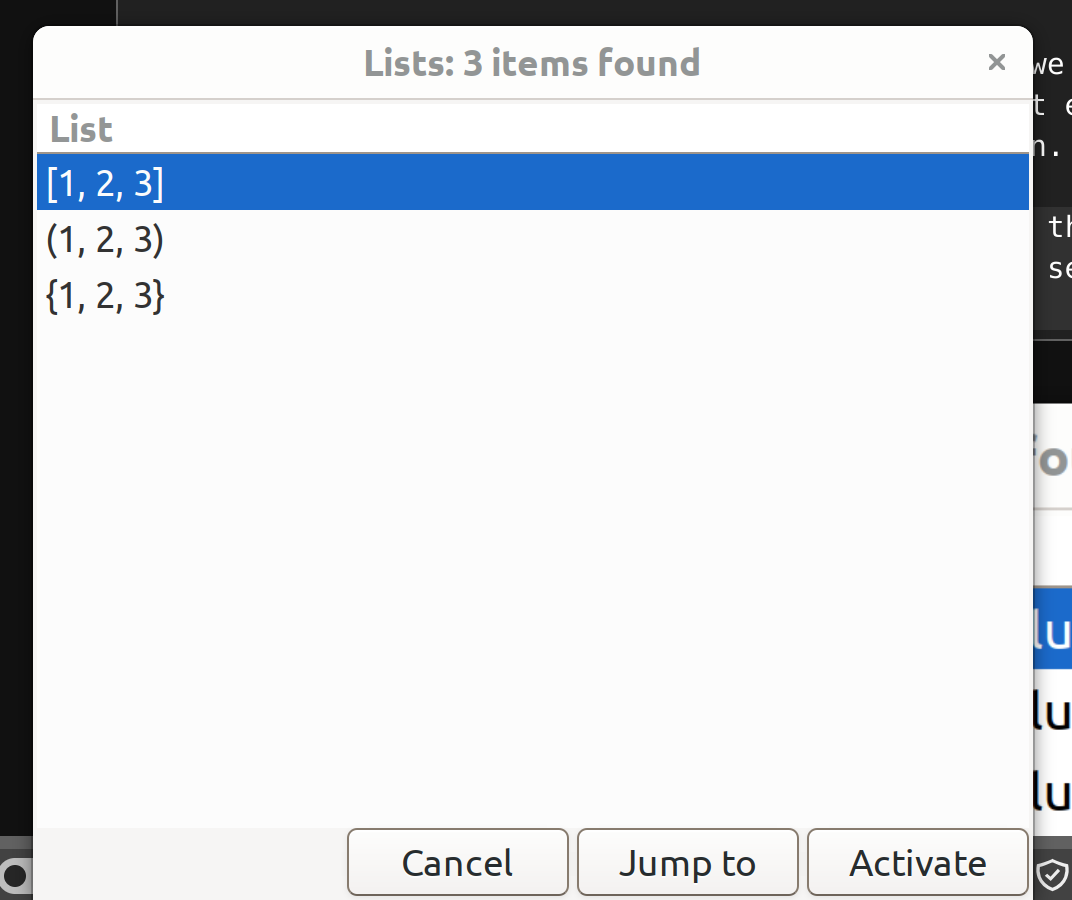
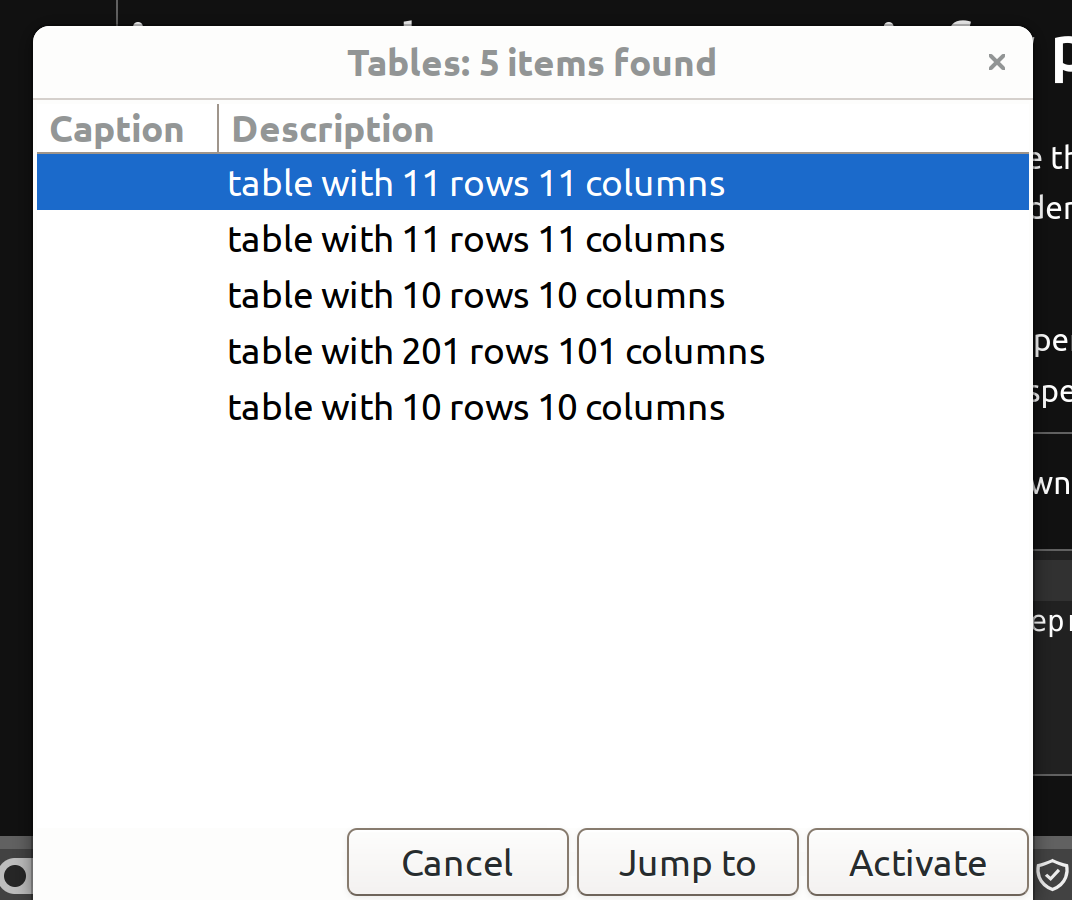
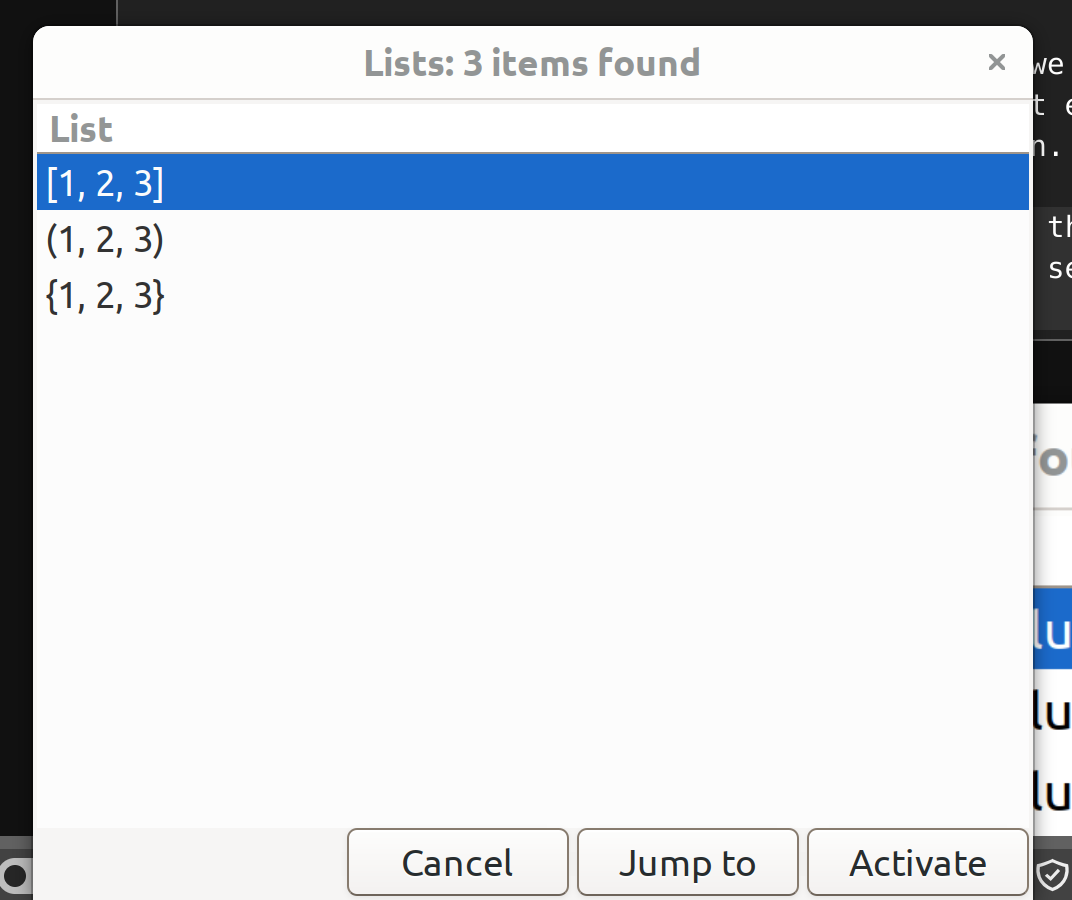
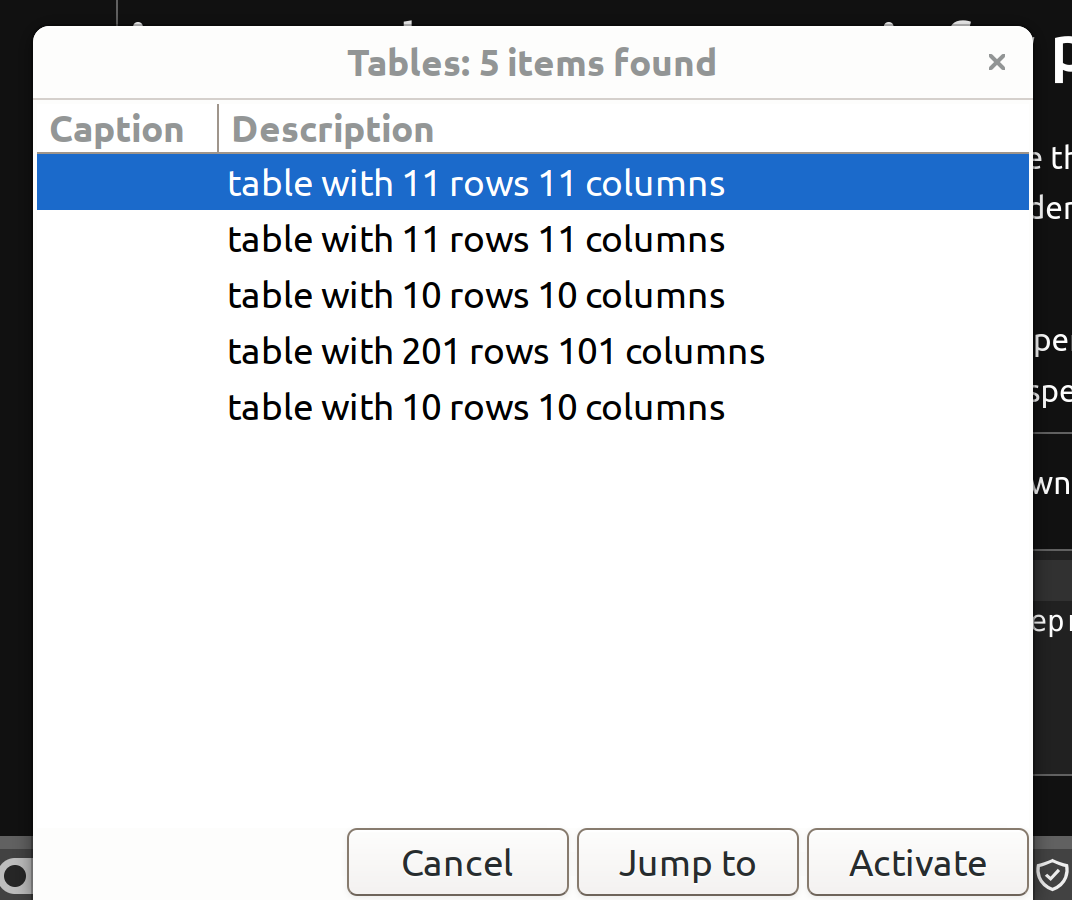

In [30]:
    if 0 or FILE:
        await df.target.apath.parent.drop_duplicates().apath.mkdir(exist_ok=True, parents=True);
        await df.apply(
            lambda s: print(F"""writing {s.target.as_uri()}""") or s.target.write_text(str(s.loc["html"])), axis=1
        ).gather()
    else:
        df.html.head(2).display.iframe().display()

    

In [31]:
    readmes = df.groupby(df.target.apath.parent / "index.html").apply(
        (top_toc := lambda x: x.apply(
          lambda y: F"""<li><a href="{relative_path(y.target.parent / "index.html", y.target)}">{y.loc["title"]}</a></li>""", axis=1
        ).pipe(lambda df: "<nav><ul>{}</ul></nav>".format("".join(df.values))))
    ).apply(nbformat.v4.new_markdown_cell).apply(lambda x: nbformat.v4.new_notebook(cells=[x])).to_frame("nb")

In [32]:
    readmes = readmes.assign(target=Config.target / readmes.index.apath.relative_to(Config.dir))

In [33]:
    await readmes.target.apath().apath.parent.drop_duplicates().apath.mkdir(exist_ok=True, parents=True);

In [34]:
    content = readmes.nb.apply(
        from_notebook_node, exporter=(
            toc_exporter := nbconvert.get_exporter("a11y")(
                exclude_input_prompt=True, 
                include_sa11y=False,
                exclude_output_prompt=True,
                exclude_anchor_links=True,
                include_toc=False,
                include_summary=False,
                table_pattern="Region"
            )
        )
    ).gather()
    primary = pandas.Series([nbformat.v4.new_notebook(cells=[nbformat.v4.new_markdown_cell(df.pipe(top_toc))])], index=[Config.target/"index.html"]).apply(
        toc_exporter.from_notebook_node
    ).apply(list).series()[0]

    if 0 or FILE:
        (await content).to_frame("html").apply(
            lambda x: print(F"write index {readmes.loc[x.name].target}") or readmes.loc[x.name].target.write_text(str(x.loc["html"])), axis=1
        )
        primary.to_frame("html").apply(
            lambda x: print(F"write index {x.name}") or x.name.write_text(str(x.loc["html"])), axis=1
        )
    else:
        (await content).display.iframe().display()
        primary.display.iframe().display()